In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


# Loading Data

In [2]:
(train_data,train_targets),(test_data,test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [3]:
train_data.shape

(404, 13)

In [6]:
print(train_data[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


# Preparing the Data

In [13]:
mean = train_data.mean(axis=0)
print(mean)

[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]


In [14]:
train_data -= mean

In [16]:
print(train_data[0])

[-2.51264057e+00 -1.14801980e+01 -2.96443069e+00 -6.18811881e-02
 -1.93559406e-02 -1.25081683e-01  2.26893564e+01  2.36629208e-01
 -5.44059406e+00 -9.88985149e+01  2.52400990e+00  4.21168317e+01
  5.97918317e+00]


In [17]:
std = train_data.std(axis=0)
print(std)

[9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


In [18]:
train_data/=std

In [19]:
test_data-= mean
test_data /=std

# Model Building

In [20]:
from keras import models, layers


def build_model():
    
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop',loss='mse',metrics=['mae'])
    
    return model


In [38]:
import numpy as np

k = 4
num_val_samples = int(len(train_data)/k)
num_epochs =100
all_scores = []
all_mae_histories = []

print(num_val_samples)
for i in range(k):
    print('Processing fold # ',i)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[: i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i+1) * num_val_samples:]],axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data,partial_train_targets,validation_data=(val_data,val_targets),epochs=num_epochs,batch_size=32,verbose=0)                                       

    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
                                           

101
Processing fold #  0
Processing fold #  1
Processing fold #  2
Processing fold #  3


In [40]:
average_mae_history = [ np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

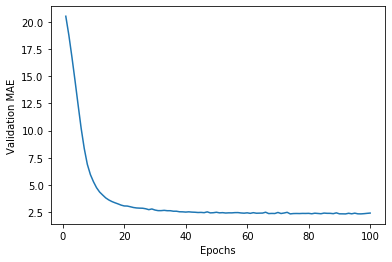

In [45]:
import matplotlib.pyplot as plt


plt.plot(range(1, len(average_mae_history) + 1) ,average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()